In [1]:
# first, second
# bids , values --> random Uniform[0,1]
# 1000 auction in each turn (for each turn we evalute )
# 1000 turns 

# u0,u1,u2 compute 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def utility(NumberOfAuctions, myValues, myBids, secondBids, myBudget, secondBudget):
    n = NumberOfAuctions
    if n==0:
    #    print("...THE AUCTION ENDED....\\")
        return 0
    else:
        mybid0 = min(myBids[0], myBudget)
        itsbid0 = min(secondBids[0], secondBudget)
       # print("my bid:", mybid0, " and its bid:", itsbid0)
        if mybid0==0 and itsbid0==0:
            return 0
        elif mybid0 > itsbid0:
#           I win this auction
         #   print("I won")
            v0 = myValues[0]
          #  print("new Budgets :",myBudget-itsbid0, secondBudget,"my value:",v0)
            del secondBids[0]
            del myBids[0]
            del myValues[0]
            return v0 + utility(n-1, myValues, myBids, secondBids, round(myBudget-itsbid0,2), round(secondBudget,2))
        else:
#           I lose this auction
         #   print("I lost")
         #   print("new Budgets :",myBudget, secondBudget-mybid0)
            del secondBids[0]
            del myBids[0]
            del myValues[0]
            return utility(n-1, myValues, myBids, secondBids, round(myBudget,2), round(secondBudget-mybid0,2))    

In [3]:
def f0(landa, values):#Bid= v*landa
    return[round(values[i]*landa,3) for i in range(len(values))]

In [4]:
def f1(landa, values):#Bid= v*landa+1/2
    return[round(values[i]*landa + 0.5,3) for i in range(len(values))]

In [5]:
def f2(landa,mu, values):#Bid= v*landa+mu
    return[round(values[i]*landa + 0.5 - landa*mu,3) for i in range(len(values))]

In [6]:
def f101(landa, values):#Bid= if v*landa>1/3 : v*landa else: (v*landa+1)/2
    return[round(values[i]*landa,3) if values[i]*landa>1/3 else round((values[i]*landa+1)/2,3) for i in range(len(values))]

In [7]:
n = 1000 #Number of auctions in a sample run
m = 1000 #Number of sample runs

second_bids = [[round(np.random.random(),3) for i in range(n)] for j in range(m)]
my_values = [[round(np.random.random(),3) for i in range(n)] for j in range(m)]

In [17]:
def u0(landa0,m):
    val_1 = [x for x in my_values[m]]
    s_bids = [x for x in second_bids[m]]
    return utility(n, val_1, f0(landa0, val_1), s_bids, B1, B2)

In [18]:
def mean0(landa0):
    v=0
    for i in range(m):
        v=v+u0(landa0,i)

        
    print("mean0(",landa0,")=", v//m)
    

    return (v//m)

In [19]:
def u1(landa0,m):
    val_1 = [x for x in my_values[m]]
    s_bids = [x for x in second_bids[m]]
    return utility(n, val_1, f1(landa0, val_1), s_bids, B1, B2)

In [20]:
def mean1(landa0):
    v=0
    for i in range(m):
        v=v+u1(landa0,i)    
    
    
    print("mean1:(",landa0,")=", v//m)

    return (v//m)

In [21]:
def u2(landa0,mu0,m):
    val_1 = [x for x in my_values[m]]
    s_bids = [x for x in second_bids[m]]
    return utility(n, val_1, f2(landa0, mu0, val_1), s_bids, B1, B2)

In [22]:
def mean2(landa0,mu0):
    v=0
    for i in range(m):
        v=v+u2(landa0,mu0,i)
        
        
    print("mean2(",landa0 , mu0,")=",v//m)
    

    return (v//m)

In [23]:
def u101(landa0,m):
    val_1 = [x for x in my_values[m]]
    s_bids = [x for x in second_bids[m]]
    return utility(n, val_1, f101(landa0,val_1), s_bids, B1, B2)

In [24]:
def mean101(landa0):
    v=0
    for i in range(m):
        v=v+u101(landa0,i)
        
        
    print("mean101(",landa0,")=",v//m)
    

    return (v//m)

In [25]:
B1,B2=100,100 #Equal budgets

revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 41.0
mean0( 0.15 )= 49.0
mean0( 0.175 )= 58.0
mean0( 0.2 )= 66.0
mean0( 0.225 )= 74.0
mean0( 0.25 )= 99.0
mean0( 0.275 )= 134.0
mean0( 0.3 )= 162.0
mean0( 0.325 )= 183.0
mean0( 0.35 )= 201.0
mean0( 0.375 )= 217.0
mean0( 0.4 )= 229.0
mean0( 0.425 )= 240.0
mean0( 0.45 )= 252.0
mean0( 0.475 )= 260.0
mean0( 0.5 )= 288.0
mean0( 0.525 )= 297.0
mean0( 0.55 )= 304.0
mean0( 0.575 )= 313.0
mean0( 0.6 )= 320.0
mean0( 0.625 )= 327.0
mean0( 0.65 )= 331.0
mean0( 0.675 )= 338.0
mean0( 0.7 )= 342.0
mean0( 0.725 )= 349.0
mean0( 0.75 )= 353.0
mean0( 0.775 )= 356.0
mean0( 0.8 )= 361.0
mean0( 0.825 )= 365.0
mean0( 0.85 )= 369.0
mean0( 0.875 )= 372.0
mean0( 0.9 )= 378.0
mean0( 0.925 )= 379.0
mean0( 0.95 )= 376.0
mean0( 0.975 )= 356.0
mean0( 1.0 )= 318.0
mean0( 1.025 )= 264.0
mean0( 1.05 )= 224.0
mean0( 1.075 )= 200.0
mean0( 1.1 )= 189.0
mean0( 1.125 )= 184.0
mean0( 1.15 )= 180.0
mean0( 1.175 )= 1

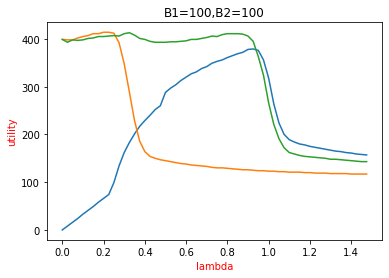

In [26]:
xx = [i/40 for i in range(60)]
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2="+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2="+str(B2))
plt.show()

In [27]:
B1,B2=100,50 #B1>B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 



mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 90.0
mean0( 0.15 )= 131.0
mean0( 0.175 )= 164.0
mean0( 0.2 )= 182.0
mean0( 0.225 )= 194.0
mean0( 0.25 )= 234.0
mean0( 0.275 )= 243.0
mean0( 0.3 )= 254.0
mean0( 0.325 )= 258.0
mean0( 0.35 )= 266.0
mean0( 0.375 )= 272.0
mean0( 0.4 )= 275.0
mean0( 0.425 )= 281.0
mean0( 0.45 )= 288.0
mean0( 0.475 )= 289.0
mean0( 0.5 )= 355.0
mean0( 0.525 )= 360.0
mean0( 0.55 )= 363.0
mean0( 0.575 )= 367.0
mean0( 0.6 )= 372.0
mean0( 0.625 )= 376.0
mean0( 0.65 )= 379.0
mean0( 0.675 )= 383.0
mean0( 0.7 )= 386.0
mean0( 0.725 )= 387.0
mean0( 0.75 )= 392.0
mean0( 0.775 )= 392.0
mean0( 0.8 )= 393.0
mean0( 0.825 )= 398.0
mean0( 0.85 )= 400.0
mean0( 0.875 )= 401.0
mean0( 0.9 )= 406.0
mean0( 0.925 )= 407.0
mean0( 0.95 )= 407.0
mean0( 0.975 )= 412.0
mean0( 1.0 )= 416.0
mean0( 1.025 )= 417.0
mean0( 1.05 )= 419.0
mean0( 1.075 )= 422.0
mean0( 1.1 )= 423.0
mean0( 1.125 )= 424.0
mean0( 1.15 )= 429.0
mean0( 1.175

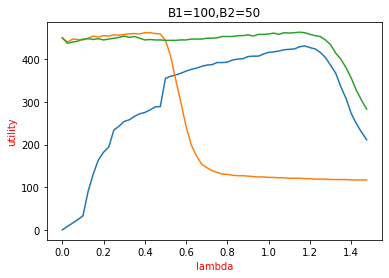

In [28]:
xx = [i/40 for i in range(60)]
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2="+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2="+str(B2))
plt.show()

In [29]:
B1,B2=100,150 #B1<B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 41.0
mean0( 0.15 )= 49.0
mean0( 0.175 )= 58.0
mean0( 0.2 )= 66.0
mean0( 0.225 )= 74.0
mean0( 0.25 )= 83.0
mean0( 0.275 )= 91.0
mean0( 0.3 )= 99.0
mean0( 0.325 )= 107.0
mean0( 0.35 )= 116.0
mean0( 0.375 )= 124.0
mean0( 0.4 )= 134.0
mean0( 0.425 )= 148.0
mean0( 0.45 )= 166.0
mean0( 0.475 )= 183.0
mean0( 0.5 )= 199.0
mean0( 0.525 )= 213.0
mean0( 0.55 )= 226.0
mean0( 0.575 )= 238.0
mean0( 0.6 )= 248.0
mean0( 0.625 )= 258.0
mean0( 0.65 )= 267.0
mean0( 0.675 )= 276.0
mean0( 0.7 )= 283.0
mean0( 0.725 )= 291.0
mean0( 0.75 )= 298.0
mean0( 0.775 )= 305.0
mean0( 0.8 )= 309.0
mean0( 0.825 )= 307.0
mean0( 0.85 )= 292.0
mean0( 0.875 )= 266.0
mean0( 0.9 )= 239.0
mean0( 0.925 )= 222.0
mean0( 0.95 )= 213.0
mean0( 0.975 )= 207.0
mean0( 1.0 )= 202.0
mean0( 1.025 )= 197.0
mean0( 1.05 )= 193.0
mean0( 1.075 )= 190.0
mean0( 1.1 )= 186.0
mean0( 1.125 )= 183.0
mean0( 1.15 )= 180.0
mean0( 1.175 )= 178

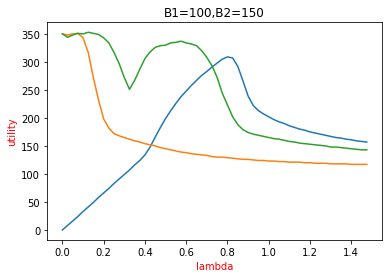

In [31]:
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2="+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2="+str(B2))
plt.show()

In [32]:
B1,B2=100,200 #B1<B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 41.0
mean0( 0.15 )= 49.0
mean0( 0.175 )= 58.0
mean0( 0.2 )= 66.0
mean0( 0.225 )= 74.0
mean0( 0.25 )= 83.0
mean0( 0.275 )= 91.0
mean0( 0.3 )= 99.0
mean0( 0.325 )= 107.0
mean0( 0.35 )= 116.0
mean0( 0.375 )= 124.0
mean0( 0.4 )= 133.0
mean0( 0.425 )= 141.0
mean0( 0.45 )= 149.0
mean0( 0.475 )= 158.0
mean0( 0.5 )= 166.0
mean0( 0.525 )= 174.0
mean0( 0.55 )= 183.0
mean0( 0.575 )= 191.0
mean0( 0.6 )= 200.0
mean0( 0.625 )= 208.0
mean0( 0.65 )= 216.0
mean0( 0.675 )= 224.0
mean0( 0.7 )= 233.0
mean0( 0.725 )= 241.0
mean0( 0.75 )= 249.0
mean0( 0.775 )= 253.0
mean0( 0.8 )= 250.0
mean0( 0.825 )= 244.0
mean0( 0.85 )= 237.0
mean0( 0.875 )= 231.0
mean0( 0.9 )= 224.0
mean0( 0.925 )= 218.0
mean0( 0.95 )= 213.0
mean0( 0.975 )= 207.0
mean0( 1.0 )= 202.0
mean0( 1.025 )= 197.0
mean0( 1.05 )= 193.0
mean0( 1.075 )= 190.0
mean0( 1.1 )= 186.0
mean0( 1.125 )= 183.0
mean0( 1.15 )= 180.0
mean0( 1.175 )= 178

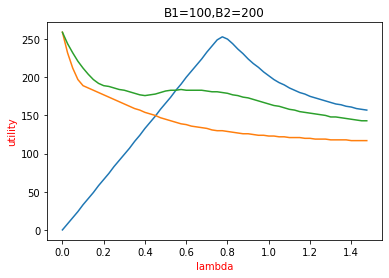

In [33]:
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2="+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2="+str(B2))
plt.show()

In [34]:
B1,B2=100,300 #B1<B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 41.0
mean0( 0.15 )= 49.0
mean0( 0.175 )= 58.0
mean0( 0.2 )= 66.0
mean0( 0.225 )= 74.0
mean0( 0.25 )= 83.0
mean0( 0.275 )= 91.0
mean0( 0.3 )= 99.0
mean0( 0.325 )= 107.0
mean0( 0.35 )= 116.0
mean0( 0.375 )= 124.0
mean0( 0.4 )= 133.0
mean0( 0.425 )= 141.0
mean0( 0.45 )= 149.0
mean0( 0.475 )= 158.0
mean0( 0.5 )= 166.0
mean0( 0.525 )= 174.0
mean0( 0.55 )= 183.0
mean0( 0.575 )= 191.0
mean0( 0.6 )= 199.0
mean0( 0.625 )= 208.0
mean0( 0.65 )= 216.0
mean0( 0.675 )= 224.0
mean0( 0.7 )= 233.0
mean0( 0.725 )= 241.0
mean0( 0.75 )= 249.0
mean0( 0.775 )= 253.0
mean0( 0.8 )= 250.0
mean0( 0.825 )= 244.0
mean0( 0.85 )= 237.0
mean0( 0.875 )= 231.0
mean0( 0.9 )= 224.0
mean0( 0.925 )= 218.0
mean0( 0.95 )= 213.0
mean0( 0.975 )= 207.0
mean0( 1.0 )= 202.0
mean0( 1.025 )= 197.0
mean0( 1.05 )= 193.0
mean0( 1.075 )= 190.0
mean0( 1.1 )= 186.0
mean0( 1.125 )= 183.0
mean0( 1.15 )= 180.0
mean0( 1.175 )= 178

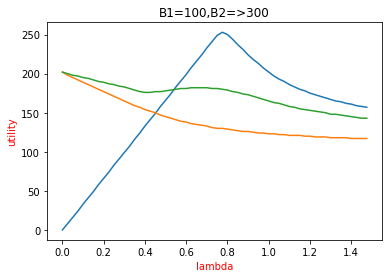

In [35]:
xx = [i/40 for i in range(60)]
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2=>"+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2=>"+str(B2))
plt.show()

In [40]:
B1,B2=50,25 #B1>B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 87.0
mean0( 0.1 )= 124.0
mean0( 0.125 )= 149.0
mean0( 0.15 )= 154.0
mean0( 0.175 )= 191.0
mean0( 0.2 )= 197.0
mean0( 0.225 )= 201.0
mean0( 0.25 )= 263.0
mean0( 0.275 )= 267.0
mean0( 0.3 )= 271.0
mean0( 0.325 )= 274.0
mean0( 0.35 )= 281.0
mean0( 0.375 )= 280.0
mean0( 0.4 )= 285.0
mean0( 0.425 )= 289.0
mean0( 0.45 )= 291.0
mean0( 0.475 )= 294.0
mean0( 0.5 )= 383.0
mean0( 0.525 )= 386.0
mean0( 0.55 )= 389.0
mean0( 0.575 )= 393.0
mean0( 0.6 )= 394.0
mean0( 0.625 )= 394.0
mean0( 0.65 )= 396.0
mean0( 0.675 )= 400.0
mean0( 0.7 )= 399.0
mean0( 0.725 )= 401.0
mean0( 0.75 )= 406.0
mean0( 0.775 )= 406.0
mean0( 0.8 )= 408.0
mean0( 0.825 )= 407.0
mean0( 0.85 )= 411.0
mean0( 0.875 )= 411.0
mean0( 0.9 )= 419.0
mean0( 0.925 )= 416.0
mean0( 0.95 )= 418.0
mean0( 0.975 )= 416.0
mean0( 1.0 )= 420.0
mean0( 1.025 )= 420.0
mean0( 1.05 )= 425.0
mean0( 1.075 )= 423.0
mean0( 1.1 )= 426.0
mean0( 1.125 )= 418.0
mean0( 1.15 )= 419.0
mean0( 1.1

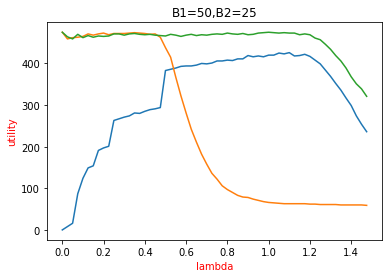

In [41]:
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2="+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2=>"+str(B2))
plt.show()

In [50]:
B1,B2=50,50 #B1=B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 90.0
mean0( 0.15 )= 131.0
mean0( 0.175 )= 164.0
mean0( 0.2 )= 182.0
mean0( 0.225 )= 194.0
mean0( 0.25 )= 234.0
mean0( 0.275 )= 243.0
mean0( 0.3 )= 254.0
mean0( 0.325 )= 258.0
mean0( 0.35 )= 266.0
mean0( 0.375 )= 272.0
mean0( 0.4 )= 275.0
mean0( 0.425 )= 281.0
mean0( 0.45 )= 288.0
mean0( 0.475 )= 289.0
mean0( 0.5 )= 355.0
mean0( 0.525 )= 360.0
mean0( 0.55 )= 363.0
mean0( 0.575 )= 367.0
mean0( 0.6 )= 372.0
mean0( 0.625 )= 376.0
mean0( 0.65 )= 379.0
mean0( 0.675 )= 383.0
mean0( 0.7 )= 386.0
mean0( 0.725 )= 387.0
mean0( 0.75 )= 392.0
mean0( 0.775 )= 392.0
mean0( 0.8 )= 393.0
mean0( 0.825 )= 398.0
mean0( 0.85 )= 399.0
mean0( 0.875 )= 398.0
mean0( 0.9 )= 399.0
mean0( 0.925 )= 394.0
mean0( 0.95 )= 378.0
mean0( 0.975 )= 352.0
mean0( 1.0 )= 310.0
mean0( 1.025 )= 249.0
mean0( 1.05 )= 207.0
mean0( 1.075 )= 163.0
mean0( 1.1 )= 134.0
mean0( 1.125 )= 112.0
mean0( 1.15 )= 102.0
mean0( 1.175

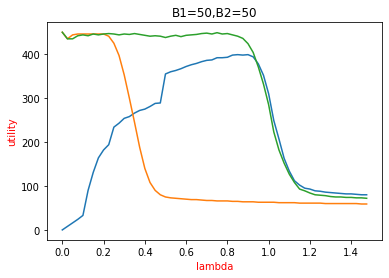

In [51]:
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2="+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2=>"+str(B2))
plt.show()

In [52]:
B1,B2=50,100 #B1<B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 41.0
mean0( 0.15 )= 49.0
mean0( 0.175 )= 58.0
mean0( 0.2 )= 66.0
mean0( 0.225 )= 74.0
mean0( 0.25 )= 99.0
mean0( 0.275 )= 134.0
mean0( 0.3 )= 162.0
mean0( 0.325 )= 183.0
mean0( 0.35 )= 201.0
mean0( 0.375 )= 217.0
mean0( 0.4 )= 229.0
mean0( 0.425 )= 240.0
mean0( 0.45 )= 252.0
mean0( 0.475 )= 260.0
mean0( 0.5 )= 288.0
mean0( 0.525 )= 297.0
mean0( 0.55 )= 304.0
mean0( 0.575 )= 313.0
mean0( 0.6 )= 320.0
mean0( 0.625 )= 327.0
mean0( 0.65 )= 330.0
mean0( 0.675 )= 333.0
mean0( 0.7 )= 327.0
mean0( 0.725 )= 307.0
mean0( 0.75 )= 265.0
mean0( 0.775 )= 216.0
mean0( 0.8 )= 171.0
mean0( 0.825 )= 146.0
mean0( 0.85 )= 127.0
mean0( 0.875 )= 118.0
mean0( 0.9 )= 114.0
mean0( 0.925 )= 110.0
mean0( 0.95 )= 107.0
mean0( 0.975 )= 105.0
mean0( 1.0 )= 102.0
mean0( 1.025 )= 100.0
mean0( 1.05 )= 98.0
mean0( 1.075 )= 96.0
mean0( 1.1 )= 94.0
mean0( 1.125 )= 93.0
mean0( 1.15 )= 91.0
mean0( 1.175 )= 90.0
m

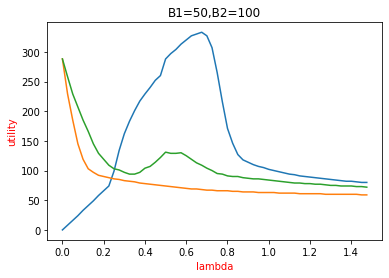

In [45]:
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2="+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2=>"+str(B2))
plt.show()

In [46]:
B1,B2=50,150 #B1<B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 41.0
mean0( 0.15 )= 49.0
mean0( 0.175 )= 58.0
mean0( 0.2 )= 66.0
mean0( 0.225 )= 74.0
mean0( 0.25 )= 83.0
mean0( 0.275 )= 91.0
mean0( 0.3 )= 99.0
mean0( 0.325 )= 107.0
mean0( 0.35 )= 116.0
mean0( 0.375 )= 124.0
mean0( 0.4 )= 134.0
mean0( 0.425 )= 148.0
mean0( 0.45 )= 166.0
mean0( 0.475 )= 183.0
mean0( 0.5 )= 199.0
mean0( 0.525 )= 213.0
mean0( 0.55 )= 224.0
mean0( 0.575 )= 225.0
mean0( 0.6 )= 212.0
mean0( 0.625 )= 187.0
mean0( 0.65 )= 166.0
mean0( 0.675 )= 152.0
mean0( 0.7 )= 145.0
mean0( 0.725 )= 140.0
mean0( 0.75 )= 135.0
mean0( 0.775 )= 131.0
mean0( 0.8 )= 127.0
mean0( 0.825 )= 123.0
mean0( 0.85 )= 120.0
mean0( 0.875 )= 117.0
mean0( 0.9 )= 113.0
mean0( 0.925 )= 110.0
mean0( 0.95 )= 107.0
mean0( 0.975 )= 105.0
mean0( 1.0 )= 102.0
mean0( 1.025 )= 100.0
mean0( 1.05 )= 98.0
mean0( 1.075 )= 96.0
mean0( 1.1 )= 94.0
mean0( 1.125 )= 93.0
mean0( 1.15 )= 91.0
mean0( 1.175 )= 90.0
mea

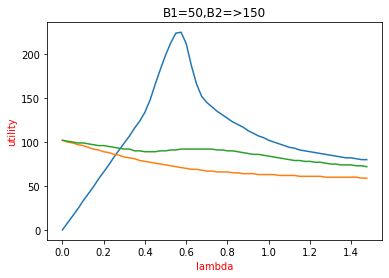

In [47]:
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2=>"+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2=>"+str(B2))
plt.show()

In [48]:
B1,B2=50,200 #B1<B2
revs0 = [mean0(x/40) for x in range(60)]
revs1 = [mean1(x/40) for x in range(60)] 
revs101 = [mean101(x/40) for x in range(60)] 


mean0( 0.0 )= 0
mean0( 0.025 )= 8.0
mean0( 0.05 )= 16.0
mean0( 0.075 )= 24.0
mean0( 0.1 )= 33.0
mean0( 0.125 )= 41.0
mean0( 0.15 )= 49.0
mean0( 0.175 )= 58.0
mean0( 0.2 )= 66.0
mean0( 0.225 )= 74.0
mean0( 0.25 )= 83.0
mean0( 0.275 )= 91.0
mean0( 0.3 )= 99.0
mean0( 0.325 )= 107.0
mean0( 0.35 )= 116.0
mean0( 0.375 )= 124.0
mean0( 0.4 )= 133.0
mean0( 0.425 )= 141.0
mean0( 0.45 )= 149.0
mean0( 0.475 )= 158.0
mean0( 0.5 )= 166.0
mean0( 0.525 )= 174.0
mean0( 0.55 )= 178.0
mean0( 0.575 )= 174.0
mean0( 0.6 )= 168.0
mean0( 0.625 )= 161.0
mean0( 0.65 )= 155.0
mean0( 0.675 )= 150.0
mean0( 0.7 )= 145.0
mean0( 0.725 )= 140.0
mean0( 0.75 )= 135.0
mean0( 0.775 )= 131.0
mean0( 0.8 )= 127.0
mean0( 0.825 )= 123.0
mean0( 0.85 )= 120.0
mean0( 0.875 )= 117.0
mean0( 0.9 )= 113.0
mean0( 0.925 )= 110.0
mean0( 0.95 )= 107.0
mean0( 0.975 )= 105.0
mean0( 1.0 )= 102.0
mean0( 1.025 )= 100.0
mean0( 1.05 )= 98.0
mean0( 1.075 )= 96.0
mean0( 1.1 )= 94.0
mean0( 1.125 )= 93.0
mean0( 1.15 )= 91.0
mean0( 1.175 )= 90.0
mea

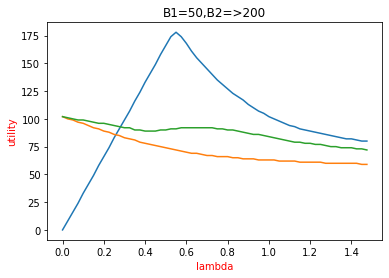

In [49]:
plt.plot(xx,revs0)
plt.plot(xx,revs1)
plt.plot(xx,revs101)

plt.title("B1="+str(B1)+",B2=>"+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2and3,m=1000"+"B1="+str(B1)+",B2=>"+str(B2))
plt.show()

In [ ]:
revs2= [[mean2(x/40,y/20) for x in range(60)] for y in range(15)]

mean2( 0.0 0.0 )= 400.0
mean2( 0.025 0.0 )= 399.0
mean2( 0.05 0.0 )= 399.0


KeyboardInterrupt: 

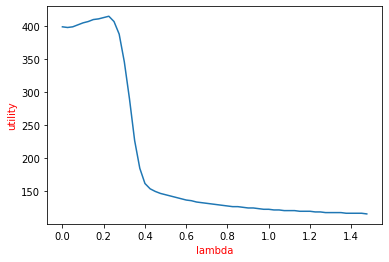

In [29]:
plt.plot(xx,max(revs2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm3,m=1000,B1,B2=100,100")
plt.show()

In [96]:
n = 1000 #Number of auctions in a sample run
m = 50000 #Number of sample runs

second_bids = [[round(np.random.random(),3) for i in range(n)] for j in range(m)]
my_values = [[round(np.random.random(),3) for i in range(n)] for j in range(m)]
B1,B2=100,100 #Equal budgets

magnifiedrevs0 = [mean0(x/1000) for x in range(900,950,5)] 
magnifiedrevs1 = [mean1(x/1000) for x in range(175,250,5)] 


landa 0.9 v: 18886515.430000104
landa 0.905 v: 18923156.211999997
landa 0.91 v: 18938754.355000176
landa 0.915 v: 18951645.51100012
landa 0.92 v: 18944248.274999768
landa 0.925 v: 18967131.27100001
landa 0.93 v: 18966742.825000037
landa 0.935 v: 18969327.544999868
landa 0.94 v: 18942526.917000026
landa 0.945 v: 18899260.765000086


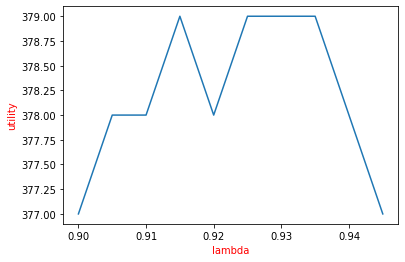

In [99]:
xx = [i/1000 for i in range(900,950,5)]
plt.plot(xx,magnifiedrevs0)
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("Magnifiedalgorithm1,m=5000,B1,B2=100,100")

plt.show()

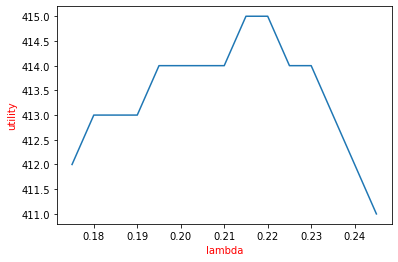

In [101]:
xx = [i/1000 for i in range(175,250,5)]
plt.plot(xx,magnifiedrevs1)
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("Magnifiedalgorithm2,m=5000,B1,B2=100,100")

plt.show()

In [17]:
B1,B2=100,100 #B1<B2
xx = [i/40 for i in range(60)]
revs101 = [mean101(x/40) for x in range(60)]
plt.plot(xx,revs101)
plt.title("B1="+str(B1)+",B2="+str(B2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("algorithm1and2,m=1000"+"B1="+str(B1)+",B2="+str(B2))
plt.show()

NameError: name 'mu0' is not defined